In [1]:
def turis(x):
    if x != None:
        if 'cm³' in x:
            return float(x.replace(' cm³',''))

In [ ]:
import pandas as pd
from Skriptai.manofunkcijos import *
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# koreliacija
db_path = '../../../web_scrap.db'
query = 'SELECT * FROM autopliuslt2;'  # SQL užklausa, kurią norite vykdyti
df_auto = query_to_dataframe(db_path,query)
df_auto['JS']= df_auto['Kaina'].apply(lambda x: float(x)*1.5)
df_auto['Kaina']= df_auto['Kaina'].apply(lambda x: float(x))
df_auto['Rida'] = df_auto['Rida'].apply(lambda x: int(x.replace(' ','').replace('km','')) if x != None else x)
df_auto['Amzius'] = df_auto['Pirma registracija'].apply(lambda x: 2024-int(x[:4]) if x != None else x)
df_auto['Turis'] = df_auto['Variklis'].apply(lambda x: x.split(',')[0] if x != None else None)
df_auto['Turis'] = df_auto['Turis'].apply(turis)

In [11]:
df_auto

,id,Markė,Modelis,Kaina,Miestas,Pirma registracija,Kuro tipas,Kėbulo tipas,Durų skaičius,Pavarų dėžė,...,Mieste,Užmiestyje,Vidutinės,Defektai,Pagaminimo data,Vairo padėtis,Registracijos data,Ilgis,Aukštis,JS
0,1,-Kita-,-kita-,1750.0,"Utena, Lietuva",2008-09,Dyzelinas,Krovininis mikroautobusas,Kita,Mechaninė,...,None,None,None,None,None,None,None,None,None,2625.0
1,2,-Kita-,-kita-,3900.0,"Jurbarkas, Lietuva",2011,Elektra,Sedanas,2/3,None,...,None,None,None,None,None,None,None,None,None,5850.0
2,3,-Kita-,-kita-,6800.0,"Kėdainiai, Lietuva",2020-02,Elektra,Hečbekas,2/3,None,...,None,None,None,None,None,None,None,None,None,10200.0
3,4,-Kita-,-kita-,60500.0,"Vilnius, Lietuva",2024,Elektra,Krovininis mikroautobusas,4/5,None,...,None,None,None,None,None,None,None,None,None,90750.0
4,5,Abarth,124 Spider,18900.0,"Kaunas, Lietuva",2017,Benzinas,Kabrioletas,2/3,Mechaninė,...,"8,5","5,1","6,4",None,None,None,None,None,None,28350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39440,39441,Volvo,XC60,29000.0,"Klaipėda, Lietuva",2019,Benzinas,Visureigis / Krosoveris,4/5,Automatinė,...,"9,5","6,5","7,5",None,None,None,None,None,None,43500.0
39441,39442,Volvo,XC90,29700.0,"Trakai, Lietuva",2019-02,Benzinas,Visureigis / Krosoveris,4/5,Automatinė,...,11,8,9,None,None,None,None,None,None,44550.0
39442,39443,Volvo,XC90,29800.0,"Vilnius, Lietuva",2019,Dyzelinas,Visureigis / Krosoveris,4/5,Automatinė,...,"6,2","5,4","5,7",None,None,None,None,None,None,44700.0
39443,39444,Volvo,XC40,29850.0,"Plungė, Lietuva",2022-05,Benzinas,Visureigis / Krosoveris,4/5,Automatinė,...,None,None,None,None,None,None,None,None,None,44775.0


In [12]:
c

,id,Kaina,JS
id,1.000000,-0.071636,-0.071636
Kaina,-0.071636,1.000000,1.000000
JS,-0.071636,1.000000,1.000000


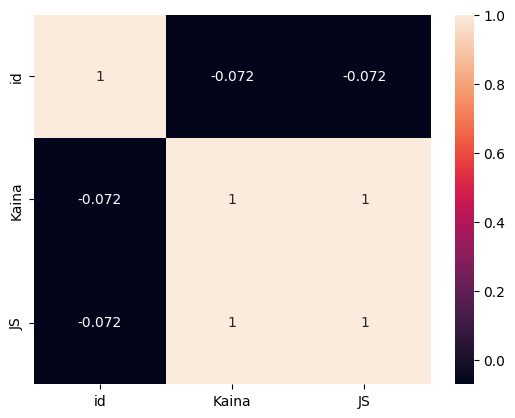

In [13]:
c = df_auto.corr(numeric_only=True)

ax = sns.heatmap(data=c,annot=True)

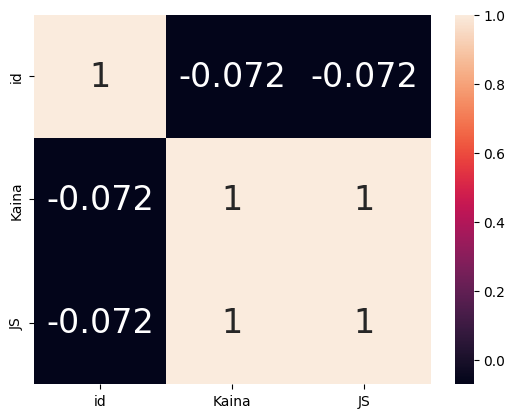

In [14]:
ax = sns.heatmap(data=c,annot=True,annot_kws={'fontsize':24})

<Axes: xlabel='Kaina', ylabel='Count'>

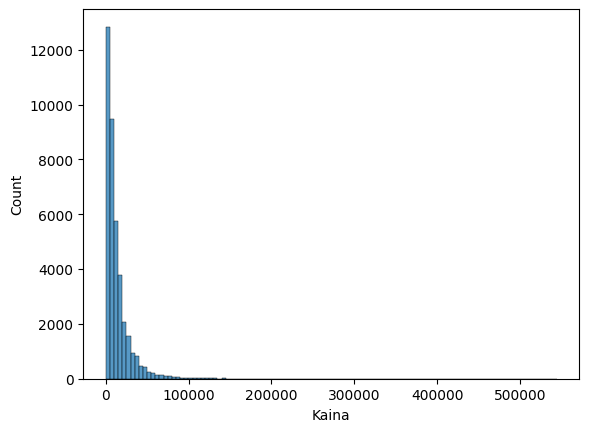

In [22]:
sns.histplot(data=df_auto, x='Kaina', binwidth=5000)

<Axes: xlabel='Kaina', ylabel='Count'>

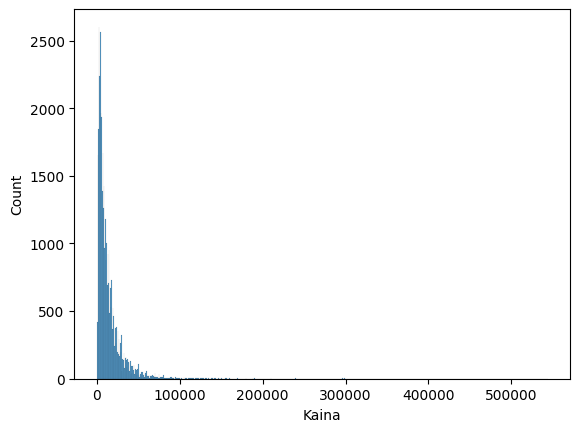

In [19]:
sns.histplot(data=df_auto, x='Kaina')

<Axes: xlabel='Kaina', ylabel='Count'>

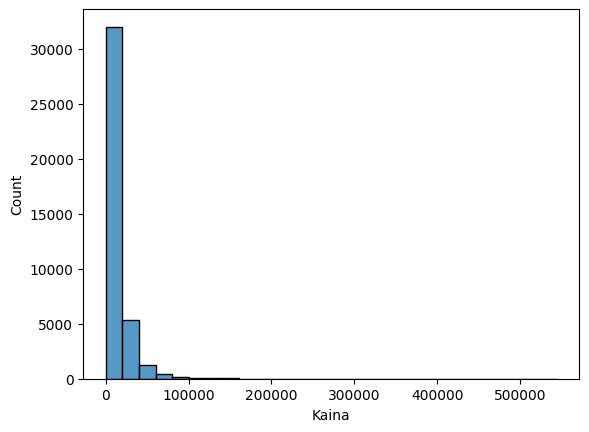

In [25]:
sns.histplot(data=df_auto, x='Kaina', binwidth=20000)

<Axes: xlabel='Kaina', ylabel='JS'>

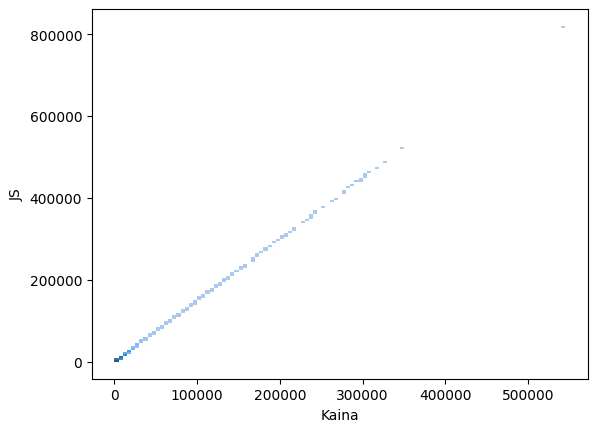

In [27]:
sns.histplot(data=df_auto, x='Kaina', y='JS', binwidth=5000)

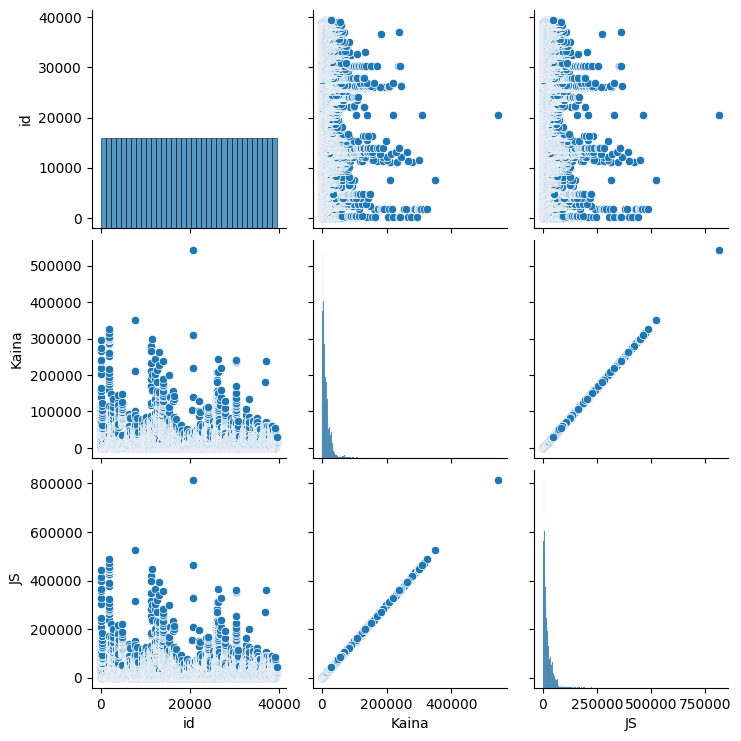

In [28]:
sns.pairplot(data=df_auto)

<Axes: >

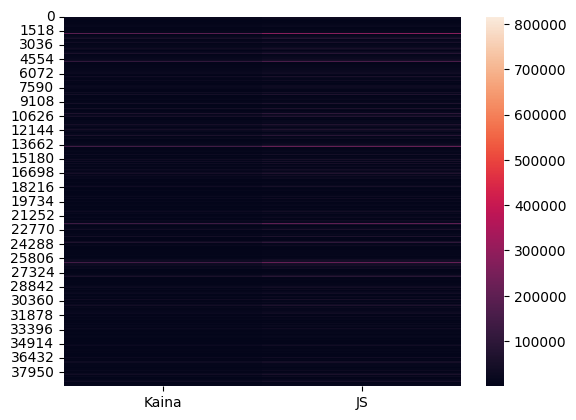

In [37]:
sns.heatmap(data=df_auto[['Kaina','JS']])
#ax.collections[0].colorbar.ax.tick_params(labelsize=fontsize) #uncomment to change colorbar labelsize

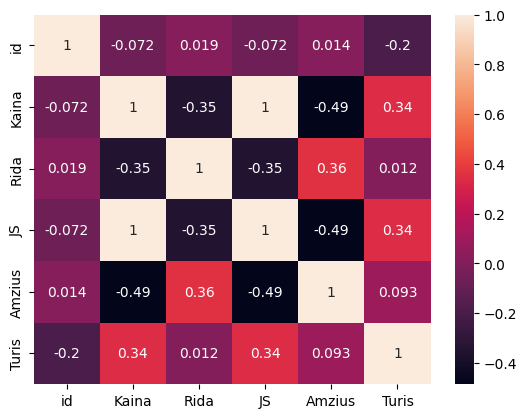

In [48]:
# suraskite, ar yra koreliacija tarp šių parametrų - ridos, kainos, automobilio amžiaus, variklio tūrio. Vizualizuokite tai su heatmap. Su histograma atvaizduokite automobilių amžiaus pasiskirstymą. 
b = df_auto.corr(numeric_only=True)
ax = sns.heatmap(data=b,annot=True)
# ar yra priklausomybė tarp butų amžiaus ir kainos? Tarp butų kambarių kiekio ir kainos? Panaudokite heatmap. Su histograma atvaizduokite butų plotų pasiskirstymą. 


<Axes: xlabel='Amzius', ylabel='Count'>

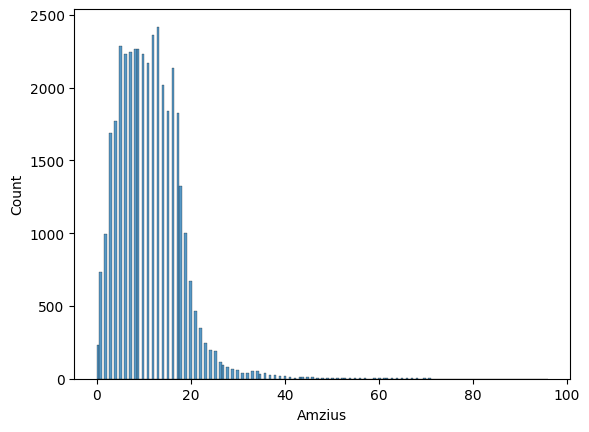

In [49]:
sns.histplot(data=df_auto, x='Amzius')

<Axes: xlabel='Amzius', ylabel='Count'>

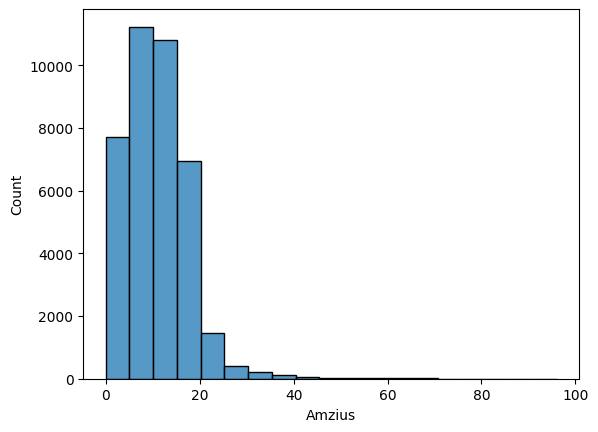

In [50]:
# Note - su histograma - paeksperimentuokite su binwidth parametru, su bins parametru - bins parametras nurodo, kiek intervalų norite turėti - skaičius čia.
sns.histplot(data=df_auto, x='Amzius', binwidth=5)

In [3]:
# Tarp butų kambarių kiekio ir kainos? Panaudokite heatmap. Su histograma atvaizduokite butų plotų pasiskirstymą.
query = 'SELECT * FROM aruodas;' 
aruodas = query_to_dataframe(db_path,query)
aruodas

,id,Miestas,Kaina,Adresas,Namo numeris,Buto numeris,Plotas,Kambarių sk.,Aukštas,Aukštų sk.,...,Tipas,Ypatybės,Papildomos patalpos,Papildoma įranga,Apsauga,Unikalus daikto numeris (RC numeris),Objektas,Kaina mėn.,Bendros erdvės pastate,Coord
0,1,"Vilnius, ŽirmūnaiRiterių g.",165000,"Vilnius, Žirmūnai, Riterių g., 2 kambarių butas",10,127,"40,52 m²",2,5,8,...,Butai pardavimui,None,None,None,None,None,None,None,None,"(54.71684325, 25.291961476410883)"
1,2,"Palanga, PalangaA. Mickevičiaus g.",268000,"Palanga, Palanga, A. Mickevičiaus g., 2 kambar...",None,None,35 m²,2,1,3,...,Butai pardavimui,Nauja kanalizacija\nNauja elektros instaliacij...,Sandėliukas\nTerasa\nVieta automobiliui,Kondicionierius\nSu baldais\nŠaldytuvas\nŠildo...,Šarvuotos durys\nSignalizacija\nKodinė laiptin...,None,None,None,None,"(55.9171652, 21.0597236)"
2,3,"Vilnius, PašilaičiaiPerkūnkiemio g.",163000,"Vilnius, Pašilaičiai, Perkūnkiemio g., 3 kamba...",53,None,67 m²,3,8,12,...,Butai pardavimui,Tualetas ir vonia atskirai\nInternetas\nKabeli...,Sandėliukas\nVieta automobiliui,Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...,Šarvuotos durys\nKodinė laiptinės spyna,None,None,None,None,"(54.737668150000005, 25.213011185027476)"
3,4,"Palanga, PalangaMedvalakio g.",62800,"Palanga, Palanga, Medvalakio g., 2 kambarių butas",27,None,"26,2 m²",2,1,2,...,Butai pardavimui,None,None,None,None,None,None,None,None,"(55.925825599999996, 21.090597860419805)"
4,5,"Palanga, PalangaMedvalakio g.",27700,"Palanga, Palanga, Medvalakio g., 1 kambario butas",27,None,14 m²,1,2,2,...,Butai pardavimui,None,None,None,Šarvuotos durys,None,None,None,None,"(55.925825599999996, 21.090597860419805)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13263,13264,"Klaipėda, CentrasTaikos pr.",1600,"Klaipėda, Centras, Taikos pr., 3 kambarių buto...",32A,None,"97,19 m²",3,4,20,...,Butai nuomai,Nauja kanalizacija\nNauja elektros instaliacij...,Balkonas\nVieta automobiliui,Kondicionierius\nSkalbimo mašina\nSu baldais\n...,Šarvuotos durys\nKodinė laiptinės spyna,None,None,1 600 €,None,"(55.6963372, 21.148903157410295)"
13264,13265,"Kaunas, CentrasMiško g.",700,"Kaunas, Centras, Miško g., 2 kambarių buto nuoma",2,None,50 m²,2,3,3,...,Butai nuomai,Nauja kanalizacija\nNauja elektros instaliacij...,Sandėliukas\nDrabužinė,Kondicionierius\nSkalbimo mašina\nSu baldais\n...,Šarvuotos durys\nKodinė laiptinės spyna,None,None,700 €,None,"(54.89371025, 23.92445922114075)"
13265,13266,"Vilnius, FabijoniškėsP. Žadeikos g.",350,"Vilnius, Fabijoniškės, P. Žadeikos g., 1 kamba...",None,None,40 m²,1,1,9,...,Butai nuomai,None,None,None,None,None,None,350 €,None,"(54.731962, 25.2433514)"
13266,13267,"Vilnius, Naujoji VilniaDūmų g.",250,"Vilnius, Naujoji Vilnia, Dūmų g., 1 kambario b...",3,None,20 m²,1,3,3,...,Butai nuomai,Atskiras įėjimas\nNauja kanalizacija\nNauja el...,Vieta automobiliui,Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...,Šarvuotos durys\nKodinė laiptinės spyna\nVaizd...,None,None,250 €,None,"(54.69285295, 25.400292867500028)"


In [4]:
aruodas_pard = aruodas[aruodas['Tipas'] == 'Butai pardavimui']
aruodas_pard['Kaina'] = aruodas_pard['Kaina'].apply(lambda x: float(x))
aruodas_pard['Kambarių sk.'] = aruodas_pard['Kambarių sk.'].apply(lambda x: int(x))
aruodas_pard['Plotas'] = aruodas_pard['Plotas'].apply(lambda x: float(x.replace(' m²', '').replace(',','.')) if x!=None else x)

C:\Users\manta\AppData\Local\Temp\ipykernel_11924\3455250873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aruodas_pard['Kaina'] = aruodas_pard['Kaina'].apply(lambda x: float(x))
C:\Users\manta\AppData\Local\Temp\ipykernel_11924\3455250873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aruodas_pard['Kambarių sk.'] = aruodas_pard['Kambarių sk.'].apply(lambda x: int(x))
C:\Users\manta\AppData\Local\Temp\ipykernel_11924\3455250873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

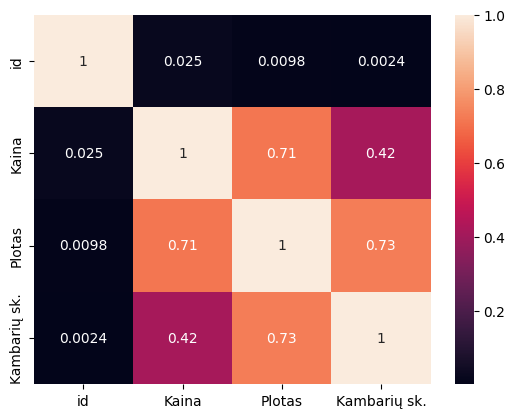

In [7]:
#  Su histograma atvaizduokite butų plotų pasiskirstymą.
d = aruodas_pard.corr(numeric_only=True)
ax = sns.heatmap(data=d,annot=True)

<Axes: xlabel='Plotas', ylabel='Count'>

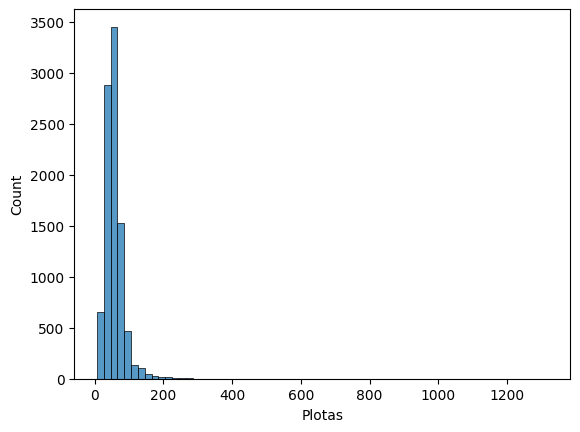

In [5]:
# Su histograma atvaizduokite butų plotų pasiskirstymą.
sns.histplot(data=aruodas_pard, x='Plotas', binwidth=20)

In [ ]:
#Atvaizduokite top3 gamintojų skelbimų ir ridų kainų pasiskirstymą su histograma. 
top3 = list(df_auto.groupby(['Markė'])['Kaina'].count().reset_index().sort_values(by= 'Kaina',ascending=False)[:3]['Markė'])
dfx = df_auto[df_auto['Markė'].isin(top3)]

<Axes: xlabel='Rida', ylabel='Count'>

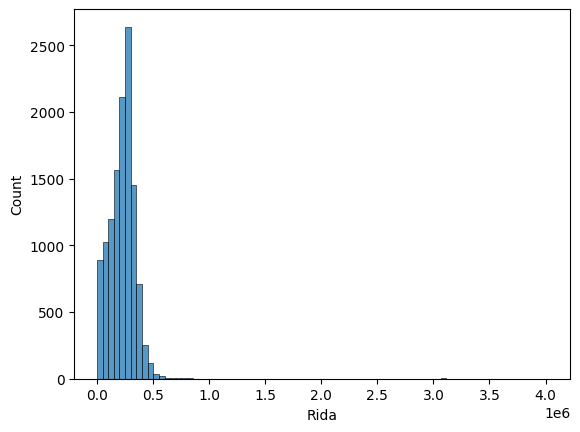

In [ ]:
# Ridos
sns.histplot(data=dfx, x='Rida', binwidth=50000)

<Axes: xlabel='Kaina', ylabel='Count'>

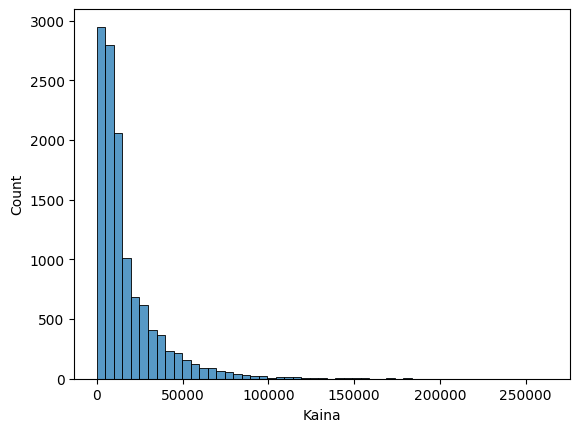

In [ ]:
#  Kainos
sns.histplot(data=dfx, x='Kaina', binwidth=5000)

<Axes: xlabel='Kaina', ylabel='Count'>

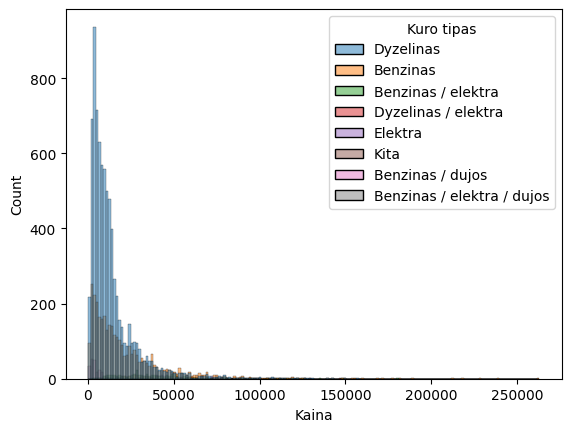

In [ ]:
# Panaudokite hue raktažodį bei multipla raktažodį, 
sns.histplot(data=dfx, x='Kaina', hue='Kuro tipas')

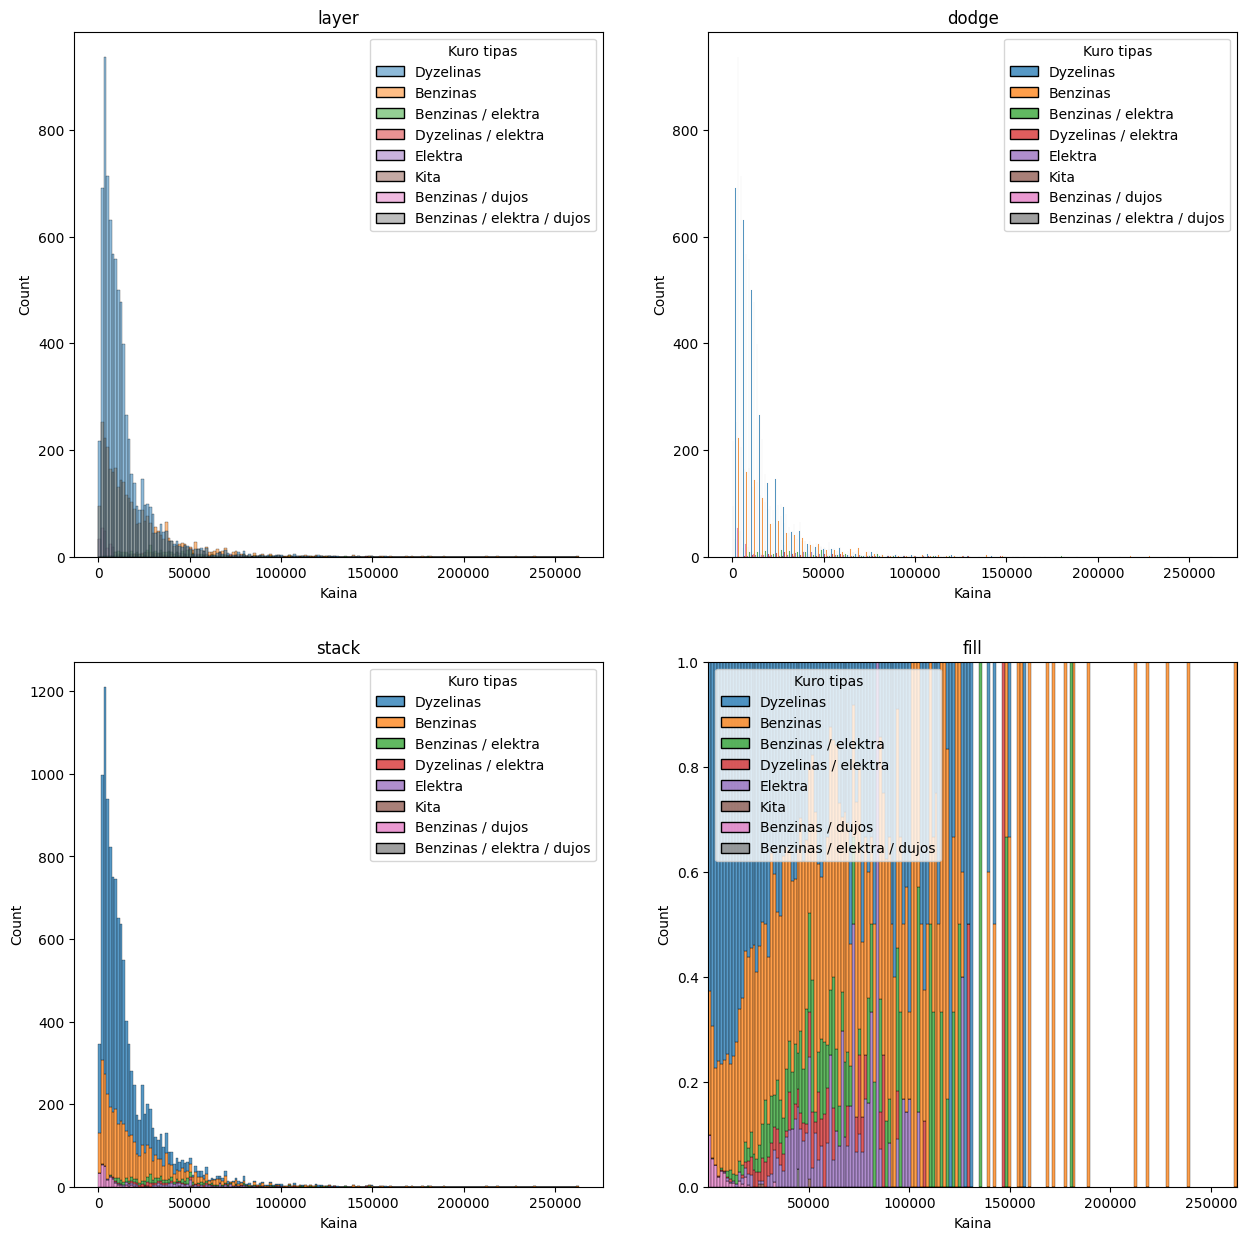

In [11]:
# išbandykite multiple raktažodžio galimas reikšmes. Kuris histogramos variantas yra infromatyviausias?
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
kws = ["layer", "dodge", "stack", "fill"]
for kw, ax in zip(kws, axes.flat):
    sns.histplot(data=dfx, x="Kaina", hue="Kuro tipas", multiple=kw, ax=ax)
    ax.set_title(kw)
plt.show()